# LLM project 1 (Document Summarisation) Preprocessing of the HF-obtained Data

## Using Google Colab Notebook for the LLM project, other files on local machine

LLM Project for Document Summarization - preprocessing step

Important packages:
- datasets (HuggingFace);
- NLTK (for stopwords/tokenizing)

transformers; pytorch in training notebook later

In [1]:
!pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.6 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset

Above: took the datasets from HF and I will specifically work on multi-news

In [3]:
ds = load_dataset('multi_news') # the dataset for us to do document summarization.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


multi_news.py:   0%|          | 0.00/3.83k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

The repository for multi_news contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/multi_news.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


train.src.cleaned:   0%|          | 0.00/548M [00:00<?, ?B/s]

train.tgt:   0%|          | 0.00/58.8M [00:00<?, ?B/s]

val.src.cleaned:   0%|          | 0.00/66.9M [00:00<?, ?B/s]

val.tgt:   0%|          | 0.00/7.30M [00:00<?, ?B/s]

test.src.cleaned:   0%|          | 0.00/69.0M [00:00<?, ?B/s]

test.tgt:   0%|          | 0.00/7.31M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/44972 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5622 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5622 [00:00<?, ? examples/s]

### What type of data is it and how can we access / manipulate it?

In [4]:
ds

DatasetDict({
    train: Dataset({
        features: ['document', 'summary'],
        num_rows: 44972
    })
    validation: Dataset({
        features: ['document', 'summary'],
        num_rows: 5622
    })
    test: Dataset({
        features: ['document', 'summary'],
        num_rows: 5622
    })
})

In [ ]:
ds['train'].features

{'document': Value(dtype='string', id=None),
 'summary': Value(dtype='string', id=None)}

In [ ]:
ds['train'][0]

{'document': 'National Archives \n \n Yes, it’s that time again, folks. It’s the first Friday of the month, when for one ever-so-brief moment the interests of Wall Street, Washington and Main Street are all aligned on one thing: Jobs. \n \n A fresh update on the U.S. employment situation for January hits the wires at 8:30 a.m. New York time offering one of the most important snapshots on how the economy fared during the previous month. Expectations are for 203,000 new jobs to be created, according to economists polled by Dow Jones Newswires, compared to 227,000 jobs added in February. The unemployment rate is expected to hold steady at 8.3%. \n \n Here at MarketBeat HQ, we’ll be offering color commentary before and after the data crosses the wires. Feel free to weigh-in yourself, via the comments section. And while you’re here, why don’t you sign up to follow us on Twitter. \n \n Enjoy the show. ||||| Employers pulled back sharply on hiring last month, a reminder that the U.S. economy 

## The Dataset, ds, has three components, all three have 'document' and 'summary' columns, string format.
- train: nearly 45,000 rows
- validation: 5622 rows
- test: Also 5622 rows

**From the documentation:** It's a mix of news articles and human-written summaries of these articles from newser.com. Each summary is professionally written by editors and links to the original articles cited.

**General comments:**
- We have what looks like an 80/10/10 split for training/validation/test, so we can train the model, then validate with hyperparameters and then test.
- Some of these are written as online news articles but some of them appear to be commentary e.g. your Cable TV News Anchor (look at `ds['train'][0]`) so we should think about how summarisation might be complicated by the different news medium.
- **Thinking about how we would start manipulating this data:**
  - Remove stopwords is essential;
  - **lemmatization with nouns and verbs** - news is about things (nouns) and things being done by/to things (man bites dog)


## Next Steps: Load into df

### Use .to_pandas() which is a HF method to convert an HF Dataset into a Pandas df (it could handle nested dictionaries which pd.DataFrame cannot)

In [5]:
df_train = ds['train'].to_pandas()
df_val = ds['validation'].to_pandas()
df_test = ds['test'].to_pandas()

In [ ]:
df_train.head()

,document,summary
0,"National Archives \n \n Yes, it’s that time ag...",– The unemployment rate dropped to 8.2% last m...
1,LOS ANGELES (AP) — In her first interview sinc...,"– Shelly Sterling plans ""eventually"" to divorc..."
2,"GAITHERSBURG, Md. (AP) — A small, private jet ...",– A twin-engine Embraer jet that the FAA descr...
3,Tucker Carlson Exposes His Own Sexism on Twitt...,– Tucker Carlson is in deep doodoo with conser...
4,A man accused of removing another man's testic...,– What are the three most horrifying words in ...


In [6]:
# let's see the length of the document by character length
df_train['document'].str.len().astype(int).describe().apply(lambda x: int(x) if x.is_integer() else round(x, 2))

,document
count,44972.00
mean,11017.72
std,19290.24
min,0.00
25%,4914.00
50%,8145.00
75%,13013.00
max,2916289.00


Above: I'm looking at the distribution of character length of the documents. One has zero characters, one has 2.9 million - some bad outliers here that should be removed

**I uncovered the lost-in-the-middle issue with doc summarisation and that ideal "chunks" of documents using models like GPT4 is about 4 - 6k tokens as input to summarise the text. We should aim to get most records into that range for the best results of summarisation**

**As a later task, once I have my model's generated summary, I will use a Pearson coefficient test to compare it to the expert 'summary' column.**

### Identify and Remove Outliers

<Axes: >

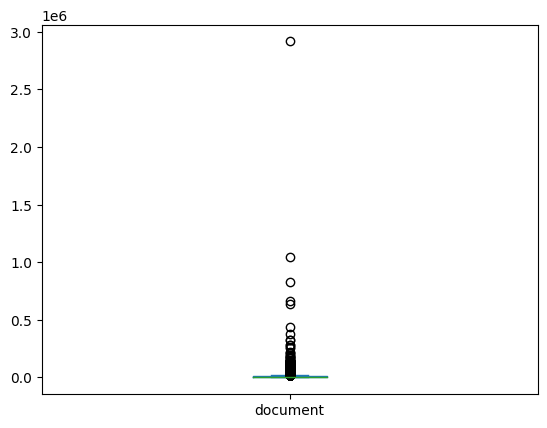

In [ ]:
# box plot of character_length in df_train
df_train['document'].str.len().astype(int).plot(kind='box')

See there are articles with 3 million or 700,000 - 1 million characters. Let's find how many out of the 45,000 are outliers in the box plot

In [7]:
# How many documents have more than 100,000 or more than 50,000 characters in the text body?

print(df_train[df_train['document'].str.len().astype(int) > 100000].shape[0])
print(df_train[df_train['document'].str.len().astype(int) > 50000].shape[0])

70
519


Outliers identified:
- There are 70 articles with more than 100,000 characters. When tokenized, will still be extremely large. This is 0.1% of the 45,000 large training data
- There are 519 articles with more than 50,000 characters. This is 1.2% of the training data

Let's remove those with over 50,000 for now in the first run.

In [8]:
# remove document char length greater than 50,000 for df_train, val, and test
df_train = df_train[df_train['document'].str.len().astype(int) < 50000]
df_test = df_test[df_test['document'].str.len().astype(int) < 50000]
df_val = df_val[df_val['document'].str.len().astype(int) < 50000]

In [9]:
df_train['document'].isnull().sum()

0

Above: We can't see nulls in a string datatype so we need to cast astype int == 0 as below, to remove the 'empty' documents

In [10]:
# what about the documents with zero characters in the document description?

df_train[df_train['document'].str.len().astype(int) == 0].shape[0]

8

In [11]:
# remove the above 8 records
df_train = df_train[df_train['document'].str.len().astype(int) > 0]

In [12]:
# Run the same operation - remove all 0 character documents - on the validation and testing datasets too
df_val = df_val[df_val['document'].str.len().astype(int) > 0]
df_test = df_test[df_test['document'].str.len().astype(int) > 0]

<Axes: >

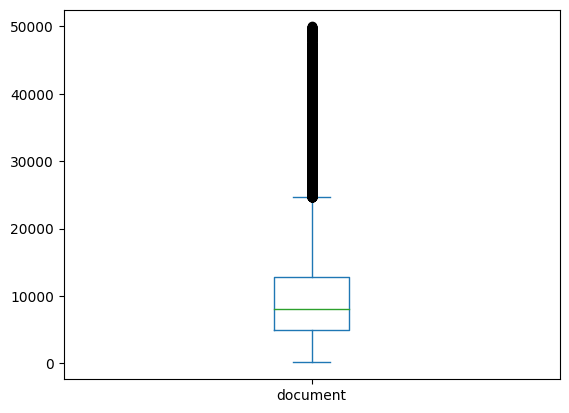

In [13]:
df_train['document'].str.len().astype(int).plot(kind='box')

So far, training, validation and testing all have no instances of empty `document` fields and they are limited to less than 50,000 characters

## Normalisation: Remove punctuation, stopwords and lowercase

In [14]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punctuation(doc):
    # strip out punctuation from review - loop through and only add non-punctuation characters
    return ''.join([char for char in doc if char not in string.punctuation])

In [16]:
df_train['doc_no_punc'] = df_train['document'].apply(remove_punctuation)

In [17]:
# same operation  - remove punctuation - to the validation and testing datasets
df_val['doc_no_punc'] = df_val['document'].apply(remove_punctuation)
df_test['doc_no_punc'] = df_test['document'].apply(remove_punctuation)

In [18]:
# now tokenize - split docs into words and make all lowercase to standardize and reduce dimensionality
def tokenize(doc):
    return doc.lower().split()

In [19]:
df_train['doc_tokenized'] = df_train['doc_no_punc'].apply(tokenize)

In [20]:
# same operation - tokenize - to validation and testing datasets
df_val['doc_tokenized'] = df_val['doc_no_punc'].apply(tokenize)
df_test['doc_tokenized'] = df_test['doc_no_punc'].apply(tokenize)

In [21]:
print(f"Shape of training data: {df_train.shape}")
print(f"Shape of validation data: {df_val.shape}")
print(f"Shape of testing data: {df_test.shape}")

Shape of training data: (44445, 4)
Shape of validation data: (5560, 4)
Shape of testing data: (5546, 4)


So far we've removed punctuation and lowercased everything. Check how many tokens:

In [22]:
df_train['doc_tokenized'].apply(len).describe()

,doc_tokenized
count,44445.000000
mean,1645.184250
std,1261.460938
min,20.000000
25%,795.000000
50%,1308.000000
75%,2070.000000
max,8752.000000


Mean of 1645 tokens per document, now remove stopwords and it will trim this down by a lot.

### Remove stopwords with NLTK

In [23]:
!pip install nltk

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [26]:
def remove_stopwords(doc):
    return [word for word in doc if word not in stop_words] # loop through the list of tokenized words and remove the stopwords

In [27]:
df_train['doc_no_stop'] = df_train['doc_tokenized'].apply(remove_stopwords)

In [28]:
# same operation - no stopwords - to the validation and testing datasets
df_val['doc_no_stop'] = df_val['doc_tokenized'].apply(remove_stopwords)
df_test['doc_no_stop'] = df_test['doc_tokenized'].apply(remove_stopwords)

In [29]:
print(df_train['doc_tokenized'].apply(len).describe())
print("\n\n")
print(df_train['doc_no_stop'].apply(len).describe())

count    44445.000000
mean      1645.184250
std       1261.460938
min         20.000000
25%        795.000000
50%       1308.000000
75%       2070.000000
max       8752.000000
Name: doc_tokenized, dtype: float64



count    44445.000000
mean       975.342221
std        754.839979
min         10.000000
25%        471.000000
50%        773.000000
75%       1225.000000
max       7599.000000
Name: doc_no_stop, dtype: float64


We have removed stopwords and gone from an average of 1645 tokens to 975 tokens, almost cut in half! The SD has also decreased.

That may have meant that there was a large variation in the tendency to use stopwords across the different news articles. Some a lot more than others, and with them gone the variation in document length has gone down.

In [ ]:
df_train.head()

,document,summary,doc_no_punc,doc_tokenized,doc_no_stop
0,"National Archives \n \n Yes, it’s that time ag...",– The unemployment rate dropped to 8.2% last m...,National Archives \n \n Yes it’s that time aga...,"[national, archives, yes, it’s, that, time, ag...","[national, archives, yes, it’s, time, folks, i..."
1,LOS ANGELES (AP) — In her first interview sinc...,"– Shelly Sterling plans ""eventually"" to divorc...",LOS ANGELES AP — In her first interview since ...,"[los, angeles, ap, —, in, her, first, intervie...","[los, angeles, ap, —, first, interview, since,..."
2,"GAITHERSBURG, Md. (AP) — A small, private jet ...",– A twin-engine Embraer jet that the FAA descr...,GAITHERSBURG Md AP — A small private jet has c...,"[gaithersburg, md, ap, —, a, small, private, j...","[gaithersburg, md, ap, —, small, private, jet,..."
3,Tucker Carlson Exposes His Own Sexism on Twitt...,– Tucker Carlson is in deep doodoo with conser...,Tucker Carlson Exposes His Own Sexism on Twitt...,"[tucker, carlson, exposes, his, own, sexism, o...","[tucker, carlson, exposes, sexism, twitter, up..."
4,A man accused of removing another man's testic...,– What are the three most horrifying words in ...,A man accused of removing another mans testicl...,"[a, man, accused, of, removing, another, mans,...","[man, accused, removing, another, mans, testic..."


There is stil a -- (double hyphen) punctuation there?

In [30]:
print(f"Shape of training data: {df_train.shape}")
print(f"Shape of validation data: {df_val.shape}")
print(f"Shape of testing data: {df_test.shape}")

Shape of training data: (44445, 5)
Shape of validation data: (5560, 5)
Shape of testing data: (5546, 5)


In [ ]:
from google.colab import files

# write a csv file for df_train to my local machine
df_train.to_csv('df_train_preprocessed.csv')
files.download('df_train_preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# write to save the df_val and df_test as well
df_val.to_csv('df_val_preprocessed.csv')
files.download('df_val_preprocessed.csv')

df_test.to_csv('df_test_preprocessed.csv')
files.download('df_test_preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RAM in the Google Colab Session is an issue so I will save the preprocessed documents before the vectorisation step to avoid crashing due to no RAM left.

Named them:
- df_train_preprocessed
- df_test_preprocessed
- df_val_preprocessed

### Update: The csv files bringing forward into LLM training are extremely large. It's likely that the LLMs such as BART and others have tokenization capabilities, so I am going to drop the doc_no_punc and doc_tokenized columns to reduce size and increase speed.



In [31]:
# drop doc_no_punc and doc_tokenized
df_train_lite = df_train.drop(['doc_no_punc', 'doc_tokenized'], axis=1)
df_val_lite = df_val.drop(['doc_no_punc', 'doc_tokenized'], axis=1)
df_test_lite = df_test.drop(['doc_no_punc', 'doc_tokenized'], axis=1)

In [32]:
df_train_lite.head()

,document,summary,doc_no_stop
0,"National Archives \n \n Yes, it’s that time ag...",– The unemployment rate dropped to 8.2% last m...,"[national, archives, yes, it’s, time, folks, i..."
1,LOS ANGELES (AP) — In her first interview sinc...,"– Shelly Sterling plans ""eventually"" to divorc...","[los, angeles, ap, —, first, interview, since,..."
2,"GAITHERSBURG, Md. (AP) — A small, private jet ...",– A twin-engine Embraer jet that the FAA descr...,"[gaithersburg, md, ap, —, small, private, jet,..."
3,Tucker Carlson Exposes His Own Sexism on Twitt...,– Tucker Carlson is in deep doodoo with conser...,"[tucker, carlson, exposes, sexism, twitter, up..."
4,A man accused of removing another man's testic...,– What are the three most horrifying words in ...,"[man, accused, removing, another, mans, testic..."


In [34]:
from google.colab import files

# write a csv file for df_train_lite to my local machine
df_train_lite.to_csv('df_train_lite.csv')
files.download('df_train_lite.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
# write to save the df_val_lite and df_test_lite as well
df_val_lite.to_csv('df_val_lite.csv')
files.download('df_val_lite.csv')

df_test_lite.to_csv('df_test_lite.csv')
files.download('df_test_lite.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# reload the saved full dataframes to test
import pandas as pd
df_train = pd.read_csv('df_train_preprocessed.csv', index_col=0)
df_val = pd.read_csv('df_val_preprocessed.csv', index_col=0)
df_test = pd.read_csv('df_test_preprocessed.csv', index_col=0)

In [ ]:
df_val.head() # it's loaded in fine

,document,summary,doc_no_punc,doc_tokenized,doc_no_stop
0,Whether a sign of a good read; or a comment on...,– The Da Vinci Code has sold so many copies—th...,Whether a sign of a good read or a comment on ...,"['whether', 'a', 'sign', 'of', 'a', 'good', 'r...","['whether', 'sign', 'good', 'read', 'comment',..."
1,The deaths of three American soldiers in Afgha...,– A major snafu has hit benefit payments to st...,The deaths of three American soldiers in Afgha...,"['the', 'deaths', 'of', 'three', 'american', '...","['deaths', 'three', 'american', 'soldiers', 'a..."
2,DUBAI Al Qaeda in Yemen has claimed responsibi...,– Yemen-based al-Qaeda in the Arabian Peninsul...,DUBAI Al Qaeda in Yemen has claimed responsibi...,"['dubai', 'al', 'qaeda', 'in', 'yemen', 'has',...","['dubai', 'al', 'qaeda', 'yemen', 'claimed', '..."
3,"Cambridge Analytica, a data firm that worked f...",– Cambridge Analytica is calling it quits. The...,Cambridge Analytica a data firm that worked fo...,"['cambridge', 'analytica', 'a', 'data', 'firm'...","['cambridge', 'analytica', 'data', 'firm', 'wo..."
4,The N.S.A.’s Evolution: The National Security ...,"– A lengthy report in the New York Times, base...",The NSA’s Evolution The National Security Agen...,"['the', 'nsa’s', 'evolution', 'the', 'national...","['nsa’s', 'evolution', 'national', 'security',..."


## Next Doc will start with preprocessed data (saved in cells immediately above) and feed into BERT or other LLM using something on Hugging Face.

The LLMs are trained to handle large raw text inputs in addition to the tokenized, preprocessed columns I could also feed it. This will be done in another notebook.

## Vectorization with Bag of Words (BoW) or TF-IDF (Term Frequency - Inverse Document Frequency)

### TF-IDF is for feature extraction (maybe later). I am going for Sequence to Sequence summary generation, so it's not necessary to go further here.

TF-IDF

Important notes:
- TF-IDF expects raw string text
- it automatically lowercases things
- load in NLTK's stopwords and it will remove those for us too
- We are running into computational RAM issues with the df at this time, so we may have to roll back one of the previous steps and run TF-IDF there.

In my preprocessing so far I have, in this order:
- Removed punctuation
- changed to all lowercase and tokenized to lists of words
- Removed stopwords using NLTK's package

We can use TF-IDF vectorizer on doc_no_punc, pass NLTK's stopwords as a parameter to achieve almost the same results and then we don't need to rejoin the tokenized cleaned words which is probably going to crash the RAM

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

# Load NLTK's stopwords list
nltk.download('stopwords')
stop_words = stopwords.words('english')

# instantiate the vectorizer
vectorizer = TfidfVectorizer(stop_words=stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# instantiate the matrix
tfidf_matrix_train = vectorizer.fit_transform(df_train['doc_no_punc'])

In [ ]:
# same ONLY TRANSFORM (Do not Fit) the validation and testing datasets
tfidf_matrix_val = vectorizer.transform(df_val['doc_no_punc'])
tfidf_matrix_test = vectorizer.transform(df_test['doc_no_punc'])

In [ ]:
print('Vocabulary:', vectorizer.vocabulary_)
# IDF Values
print('IDF Values:', vectorizer.idf_)

Vocabulary: {'whether': 147961, 'sign': 125549, 'good': 60541, 'read': 113611, 'comment': 35299, 'pulp': 111316, 'nature': 95120, 'genres': 58954, 'fiction': 53998, 'oxfam': 102120, 'secondhand': 122176, 'book': 25854, 'charts': 31999, 'remained': 115275, 'da': 39909, 'vinci': 145164, 'code': 34521, 'authors': 19833, 'favour': 53293, 'past': 103554, 'four': 56292, 'years': 150712, 'dan': 40198, 'brown': 27558, 'topped': 138447, 'oxfams': 102121, 'donated': 45386, 'list': 83231, 'fourth': 56388, 'consecutive': 36331, 'year': 150679, 'sold': 127889, '80': 10258, 'million': 90625, 'copies': 37085, 'novels': 98223, 'new': 96081, 'york': 151027, 'times': 137587, 'bestseller': 23521, 'week': 147165, 'hardly': 63841, 'surprising': 133175, 'browns': 27584, 'hefty': 64971, 'tomes': 138189, 'charity': 31918, 'readers': 113616, 'keen': 77572, 'make': 85897, 'room': 118260, 'shelves': 124444, 'another': 16685, 'cult': 39345, 'crime': 38576, 'writer': 149807, 'responsible': 116103, 'heavyweight': 6